## Tutoriel : interagir avec le système de stockage S3 du SSP Cloud (MinIO)

In [67]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import s3fs
import zipfile

### Récupérer les données d'un challenge

In [3]:
# Create filesystem object
S3_ENDPOINT_URL = "https://" + os.environ["AWS_S3_ENDPOINT"]
fs = s3fs.S3FileSystem(client_kwargs={'endpoint_url': S3_ENDPOINT_URL})

In [4]:
# Lister les challenges
fs.ls("gvimont/diffusion/hackathon-minarm-2024")

['gvimont/diffusion/hackathon-minarm-2024/AIVSAI',
 'gvimont/diffusion/hackathon-minarm-2024/Acoustique',
 'gvimont/diffusion/hackathon-minarm-2024/Similarité']

In [5]:
# Lister les fichiers d'un challenge
fs.ls("gvimont/diffusion/hackathon-minarm-2024/Acoustique")

['gvimont/diffusion/hackathon-minarm-2024/Acoustique/LivingRoom_preprocessed_hack.zip']

In [7]:
# Télécharger les données dans le service
if not 'data' in os.listdir():
    PATH_IN = 'gvimont/diffusion/hackathon-minarm-2024/Acoustique/LivingRoom_preprocessed_hack.zip'
    fs.download(PATH_IN, './data/LivingRoom_preprocessed_hack.zip')

In [8]:
# Décompresser les données
if not 'data' in os.listdir():
    with zipfile.ZipFile("data/LivingRoom_preprocessed_hack.zip","r") as zip_file:
        zip_file.extractall("data/")

### Exploiter des données

In [3]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import s3fs
import zipfile

In [4]:
#data_to_load = ["Human_1"]
#data_to_load = ["Human_1","Human_2"]
data_to_load = ["Empty", "Human_1", "Human_2"]

In [5]:
if "Empty" in data_to_load:
    df_Empty = np.load('data/LivingRoom_preprocessed_hack/Empty/deconvolved.npy')

if "Human_1" in data_to_load:
    df_Human1_target = np.load('data/LivingRoom_preprocessed_hack/Human1/centroid.npy')
    df_Human1_features = np.load('data/LivingRoom_preprocessed_hack/Human1/deconvoled_trim.npy')

if "Human_2" in data_to_load:
    df_Human2_target = np.load('data/LivingRoom_preprocessed_hack/Human2/centroid.npy')
    df_Human2_features = np.load('data/LivingRoom_preprocessed_hack/Human2/deconvoled_trim.npy')

In [6]:
df_Human1_features.shape, df_Human2_features.shape

((1000, 4, 667200), (104, 4, 667200))

In [42]:
df_Empty.shape

(100, 10, 667200)

In [7]:
combined_features = np.concatenate([df_Human1_features, df_Human2_features], axis=0)
combined_target = np.concatenate([df_Human1_target, df_Human2_target], axis=0)

print(combined_features.shape,'\n')
print(combined_features)

(1104, 4, 667200) 

[[[ 9.07240337e-06  1.71257434e-05  1.22597794e-05 ...  8.86178623e-06
    1.40686043e-05  1.06616626e-05]
  [-8.23853679e-06 -8.23373648e-06 -8.74563466e-06 ...  2.87394778e-06
   -8.90485808e-06 -3.52464713e-06]
  [ 6.62780906e-07 -1.40201587e-06  1.83228190e-06 ... -1.06218545e-06
    8.53497477e-06  2.28155182e-06]
  [ 8.11119719e-07 -2.47451499e-06  5.82140547e-06 ...  7.73804004e-06
    2.29692650e-05  1.10566034e-05]]

 [[ 1.64466037e-05  1.53698293e-05  1.91599720e-05 ...  1.76548729e-05
    1.70955263e-05  1.41169767e-05]
  [ 1.05826217e-07  9.13145777e-06  1.76140716e-07 ...  1.21369967e-05
    1.55958387e-05  1.23088676e-05]
  [ 7.06836090e-06  3.26818258e-06  7.15508941e-06 ...  4.64980394e-06
    8.96262554e-06  6.55734584e-06]
  [-3.18089551e-05 -8.93297238e-06 -2.51026504e-05 ... -7.02741545e-07
    1.34268867e-05  3.24307348e-06]]

 [[ 4.71092753e-05  4.42863784e-05  4.81883108e-05 ...  5.11715079e-05
    4.54165129e-05  4.68136932e-05]
  [-2.2504587

In [8]:
combined_target = np.concatenate([df_Human1_target, df_Human2_target], axis=0)
print(combined_target.shape,'\n')
print(combined_target)

(1104, 2) 

[[-3231.3293467  -1127.87771457]
 [-3198.54107875  -744.5100656 ]
 [-3192.9776274   -248.26678827]
 ...
 [-2652.683178     858.21826774]
 [-3089.8571679    970.63036148]
 [-2537.70644544   372.03539505]]


In [247]:
'''from sklearn.utils import shuffle

combined_features, combined_target = shuffle(combined_features, combined_target, random_state=42)
print(combined_features)'''
#Le shuffle biaise les calculs

[[[-2.86487477e-07 -3.39468761e-06 -4.47438822e-07 ... -5.12081215e-06
    5.32638239e-07 -2.99633143e-06]
  [ 4.20794231e-06  1.54867939e-06 -6.14551755e-06 ...  3.00465649e-06
   -2.67512655e-06  1.92857692e-06]
  [ 3.75701552e-06  1.33621443e-05  1.07355265e-06 ...  7.29666726e-06
    5.88172816e-06  6.21486106e-06]
  [ 2.72540401e-05  8.00574708e-06  3.95278003e-05 ...  1.16900437e-05
    7.60926105e-06  1.40300544e-05]]

 [[-5.53867540e-06 -5.44383693e-06 -1.19801871e-05 ... -5.47676962e-07
   -1.33846361e-05 -1.78313246e-06]
  [-1.98235612e-05 -5.95549500e-06 -2.00723189e-05 ... -1.34496322e-05
   -1.31100869e-05 -1.67527942e-05]
  [ 8.07989636e-06  1.21980690e-07  7.22439609e-06 ...  1.20643188e-06
    4.56077805e-06  3.02856529e-06]
  [ 3.44931032e-05  3.95361203e-05  4.42728633e-05 ...  1.00028683e-05
    7.05874663e-06  1.21625044e-05]]

 [[ 1.60768177e-05  2.66341995e-05  2.10995931e-05 ...  2.84005146e-05
    2.64118444e-05  2.96339149e-05]
  [-5.60327429e-08 -2.08122856e-0

### Cleaning Empty

In [27]:
df_Empty_cleaned = df_Empty[:, [0, 3, 5, 8], :]
df_Empty_cleaned.shape

(100, 4, 667200)

In [28]:
X_Empty = df_Empty_cleaned
X_rms_Empty = np.sqrt(np.mean(np.square(X_Empty), axis=2))

In [29]:
from sklearn.decomposition import PCA

X_reshaped_Empty = X_Empty.reshape(100, -1) 
pca = PCA(n_components=50) 
X_pca_Empty = pca.fit_transform(X_reshaped_Empty)

## Visualisation des données

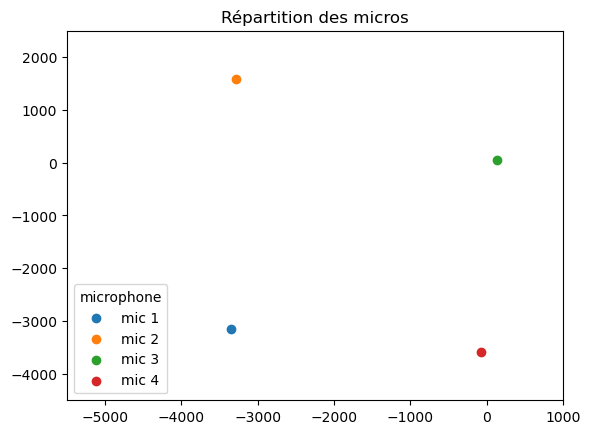

In [14]:
import numpy as np

# Microphone Locations
mic_height = 50.3125
feet = 12
y_tile = 23.5
x_tile = 11 +7/8

camera_origin_location = np.array([-6*x_tile-5.75, -y_tile, 45+13/16])*25.4

mic_1 = np.array([-11*x_tile - 1, -5*y_tile - 6-3/8, mic_height]) * 25.4 
mic_4= np.array([-11*x_tile + 1.25 + 1/16, 2.5*y_tile+3.75, mic_height]) * 25.4
mic_6 = np.array([5+3/8, 2+1/8, mic_height]) * 25.4
mic_9 = np.array([-3, -6*y_tile - 0.5, mic_height]) * 25.4


mic_xyzs = np.stack((mic_1,mic_4, mic_6, mic_9),axis=0)

SPEAKER_BOTTOM_RIGHT_Y = (1200.15 + 1196.975 + 1206.5)/ 3
SPEAKER_BOTTOM_RIGHT_X = (88.9 + 107.95 + 101.6) / 3
SPEAKER_BOTTOM_LEFT_Y = (1327.15 + 1311.55712764 + 1317.625) / 3
SPEAKER_BOTTOM_LEFT_X = - 76.98583188

speaker_xyz_bottom_right = np.array([SPEAKER_BOTTOM_RIGHT_X, SPEAKER_BOTTOM_RIGHT_Y, 44.5*25.4])
speaker_xyz_bottom_left = np.array([SPEAKER_BOTTOM_LEFT_X, SPEAKER_BOTTOM_LEFT_Y, 44.5*25.4])
speaker_xyz_top_right = np.array([SPEAKER_BOTTOM_RIGHT_X, SPEAKER_BOTTOM_RIGHT_Y, (44.5+17)*25.4])
speaker_xyz_top_left = np.array([SPEAKER_BOTTOM_LEFT_X, SPEAKER_BOTTOM_LEFT_Y, (44.5+17)*25.4])
speaker_xyz = (speaker_xyz_bottom_right+speaker_xyz_bottom_left+speaker_xyz_top_right+speaker_xyz_top_left)/4


walls = None
x_min = - 4000
x_max = 500
y_min = -4000
y_max = 2000


## affichier la disposition des microphones.
for idx, mic in enumerate(mic_xyzs):
    plt.scatter(mic[0], mic[1], label=f'mic {idx+1}')

plt.title("Répartition des micros")
plt.xlim([-5500, 1000])
plt.ylim([-4500, 2500])
plt.legend(loc="lower left", title="microphone")

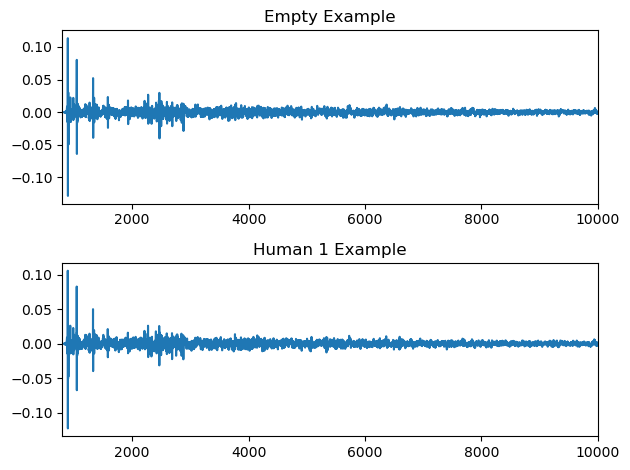

In [55]:
plt.subplot(2,1,1)
plt.plot(df_Empty[0][0])
plt.xlim([800,10000])
plt.title("Empty Example")

plt.subplot(2,1,2)
plt.plot(df_Human1_features[0][0])
plt.xlim([800,10000])
plt.title("Human 1 Example")

plt.tight_layout()


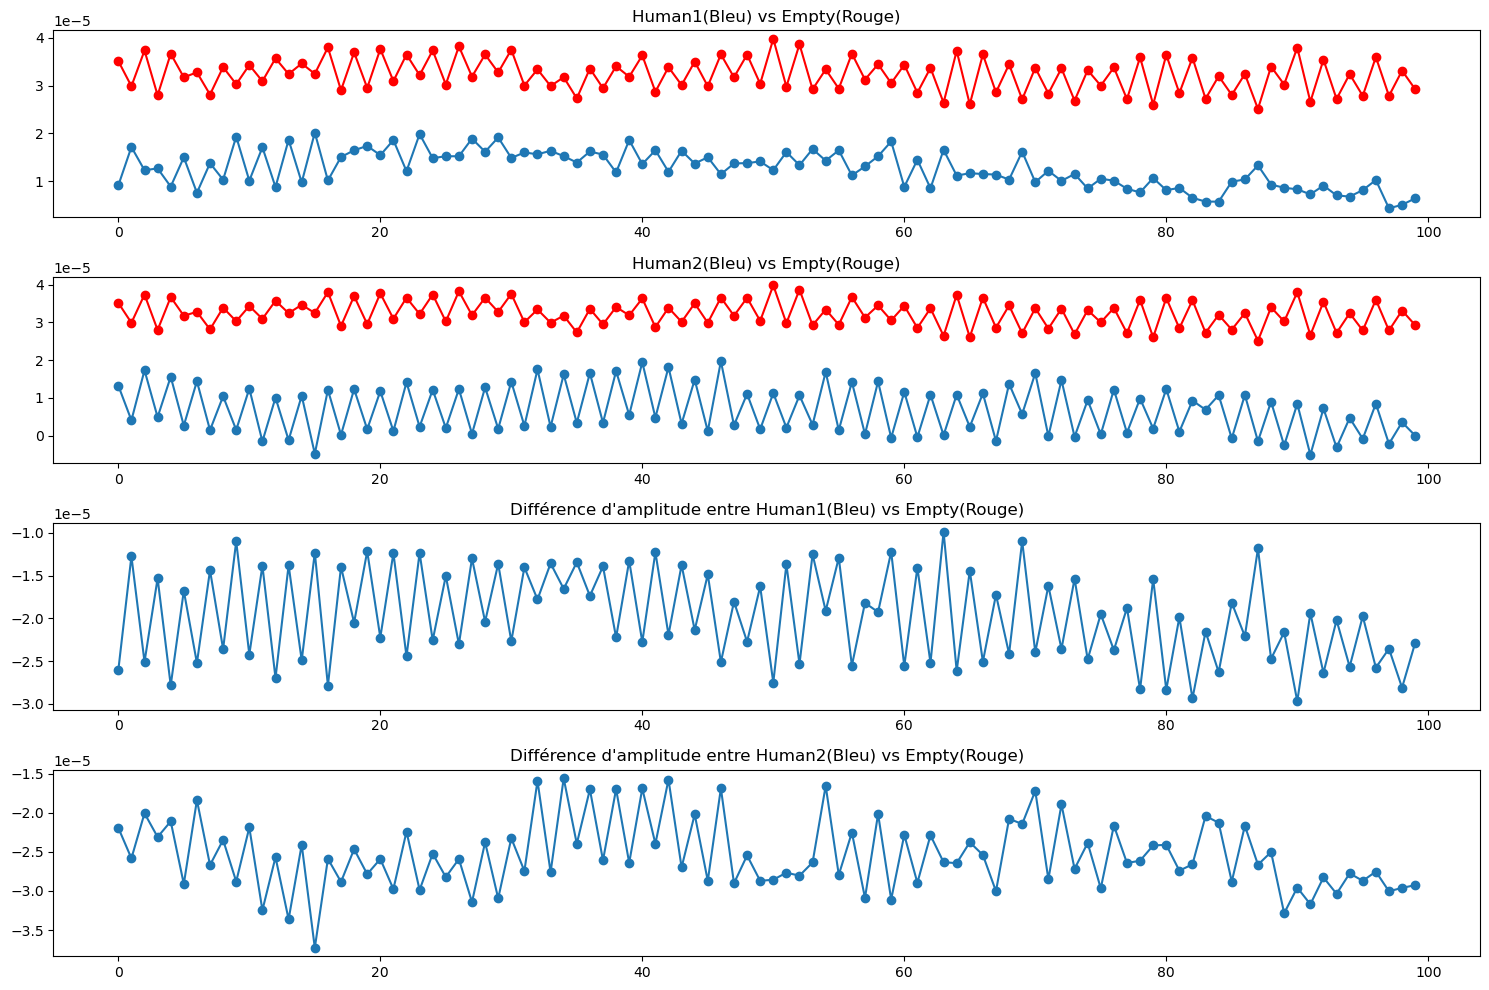

In [33]:
plt.figure(figsize=(15, 10))
plt.subplot(4,1,1)
plt.plot(df_Human1_features[0][0][:100], marker='o')
plt.plot(df_Empty_cleaned[0][0][:100], marker='o', color='red', alpha=1)
plt.title('Human1(Bleu) vs Empty(Rouge)')


plt.subplot(4,1,2)
plt.plot(df_Human2_features[0][0][:100],  marker='o')
plt.plot(df_Empty_cleaned[0][0][:100],  marker='o', color='red', alpha=1)
plt.title('Human2(Bleu) vs Empty(Rouge)')

plt.subplot(4,1,3)
plt.plot(df_Human1_features[0][0][:100] - df_Empty_cleaned[0][0][:100],  marker='o')
plt.title("Différence d'amplitude entre Human1(Bleu) vs Empty(Rouge)")

plt.subplot(4,1,4)
plt.plot(df_Human2_features[0][0][:100] - df_Empty_cleaned[0][0][:100],  marker='o')
plt.title("Différence d'amplitude entre Human2(Bleu) vs Empty(Rouge)")


plt.tight_layout()

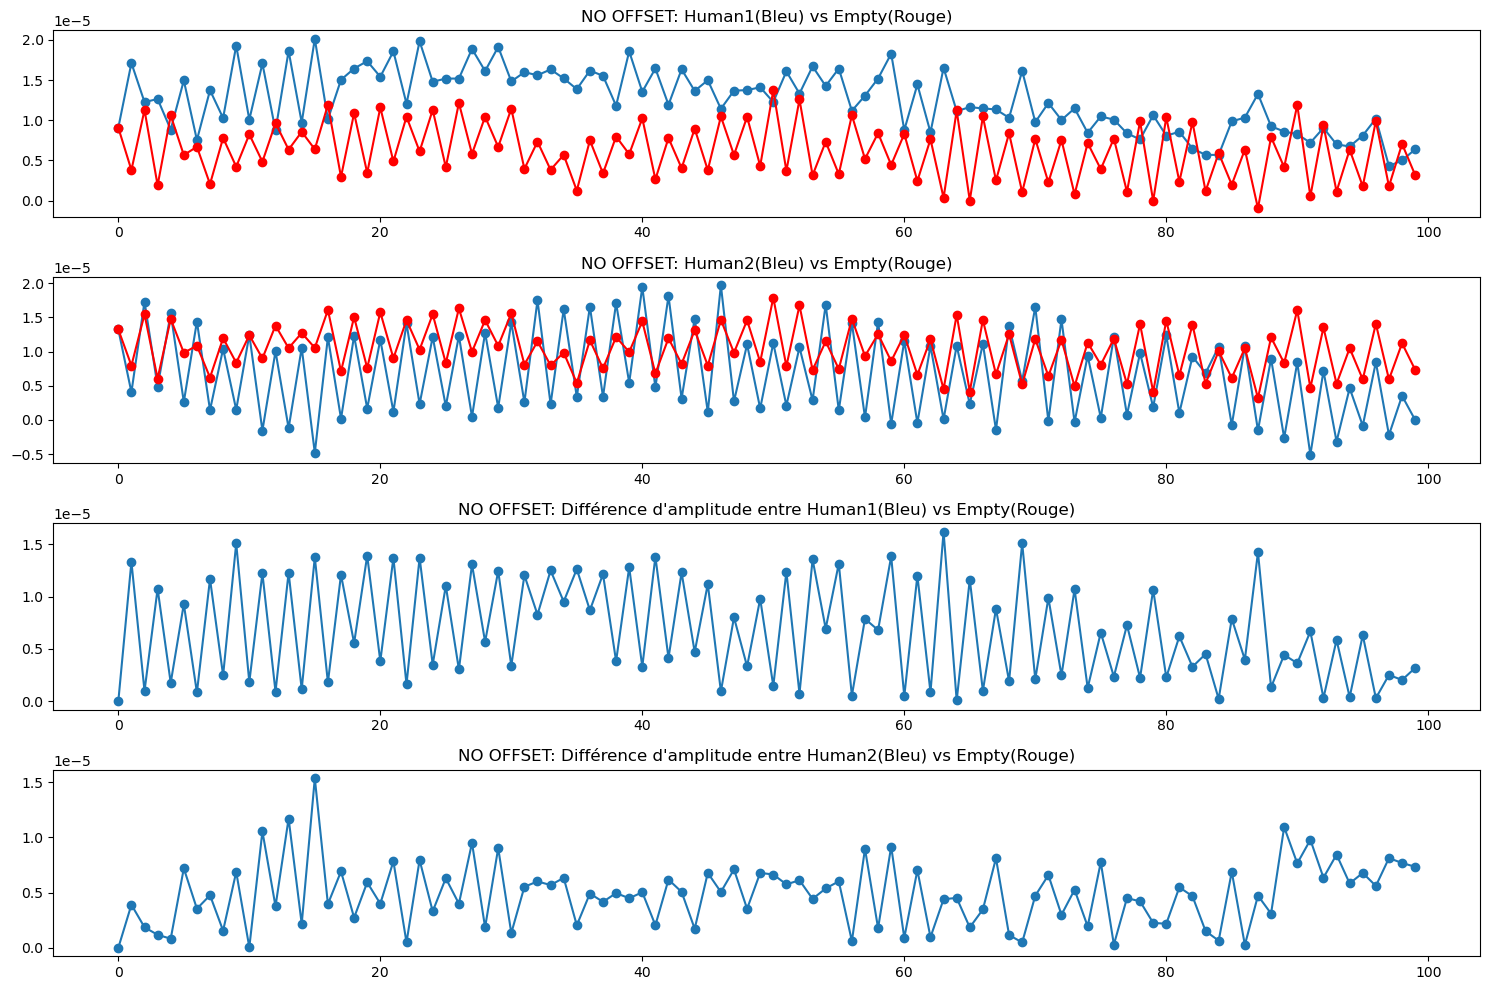

In [192]:
df_Empty_Calibred_1 = df_Empty_cleaned - (df_Empty_cleaned[0][0][0] - df_Human1_features[0][0][0])
df_Empty_Calibred_2 = df_Empty_cleaned - (df_Empty_cleaned[0][0][0] - df_Human2_features[0][0][0])

plt.figure(figsize=(15, 10))
plt.subplot(4,1,1)
plt.plot(df_Human1_features[0][0][:100], marker='o')
plt.plot(df_Empty_Calibred_1[0][0][:100], marker='o', color='red', alpha=1)
plt.title('NO OFFSET: Human1(Bleu) vs Empty(Rouge)')


plt.subplot(4,1,2)
plt.plot(df_Human2_features[0][0][:100],  marker='o')
plt.plot(df_Empty_Calibred_2[0][0][:100],  marker='o', color='red', alpha=1)
plt.title('NO OFFSET: Human2(Bleu) vs Empty(Rouge)')


plt.subplot(4,1,3)
plt.plot(abs(df_Human1_features[0][0][:100] - df_Empty_Calibred_1[0][0][:100]),  marker='o')
plt.title("NO OFFSET: Différence d'amplitude entre Human1(Bleu) vs Empty(Rouge)")

plt.subplot(4,1,4)
plt.plot(abs(df_Human2_features[0][0][:100] - df_Empty_Calibred_2[0][0][:100]),  marker='o')
plt.title("NO OFFSET: Différence d'amplitude entre Human2(Bleu) vs Empty(Rouge)")

plt.tight_layout()

In [203]:
df_Empty_Calibred_1 = df_Empty_cleaned - (df_Empty_cleaned[0][0][0] - df_Human1_features[0][0][0])
df_Human1_features_Calibred = df_Human1_features
for i in range(1000):
    df_Human1_features_Calibred[i][:][:] = abs(df_Human1_features[i][:][:] - df_Empty_Calibred_1[0][:][:])

### Visualisation de Fourrier

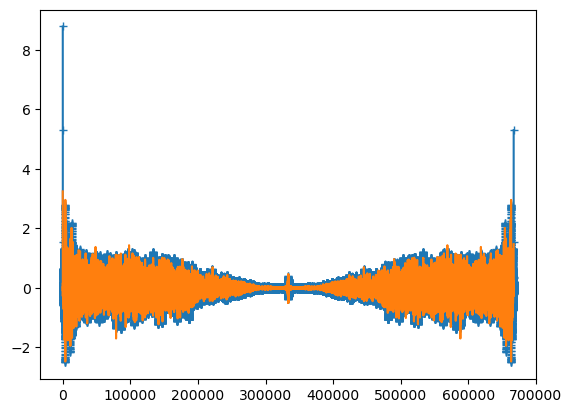

In [52]:

plt.plot(np.fft.fft(df_Empty_cleaned[0][0]), marker='+')
plt.plot(np.fft.fft(df_Human1_features[0][0]))

plt.ylabel("Empty Orange")


In [58]:
import numpy as np

# Calcul des FFTs pour les deux datasets
fft_empty = np.fft.fft(df_Empty_cleaned)
fft_human = np.fft.fft(df_Human1_features)

# Calcul des différences des premiers et derniers éléments FFT
premiere_fft = fft_empty[:][:][0] - fft_human[:100][:][0]
dernier_fft = fft_empty[:][:][-1] - fft_human[:100][:][-1]

# Calcul de la moyenne des premiers et derniers éléments
X_fft = (premiere_fft + dernier_fft) / 2


In [62]:
premiere_fft.shape

(4, 667200)

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Supposons que 'X' est déjà chargé et prétraité, de même pour 'y'

# Normalisation des caractéristiques pour améliorer les performances du KNN
scaler = StandardScaler()
X_fft = X_fft.reshape(1000,-1)
X_scaled = scaler.fit_transform(X_fft)

# Si la taille des données est petite, utiliser une proportion plus grande pour l'entraînement
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Assurer que n_neighbors est inférieur ou égal au nombre d'échantillons dans X_train
n_neighbors = min(5, len(X_train) - 1)  # -1 pour s'assurer d'avoir au moins 1 voisin

# Création du modèle KNN de régression avec un nombre ajusté de voisins
knn_reg = KNeighborsRegressor(n_neighbors=n_neighbors)
knn_reg.fit(X_train, y_train)

# Prédiction sur les données de test
y_pred = knn_reg.predict(X_test)

# Calcul des métriques
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
dist_eucl = mean_euclidean_distance(y_test, y_pred)

print("Mean Absolut Error:", mae)
print("Dist Eucl", dist_eucl)
print("R2 Score:", r2)


ValueError: cannot reshape array of size 2668800 into shape (1000,newaxis)

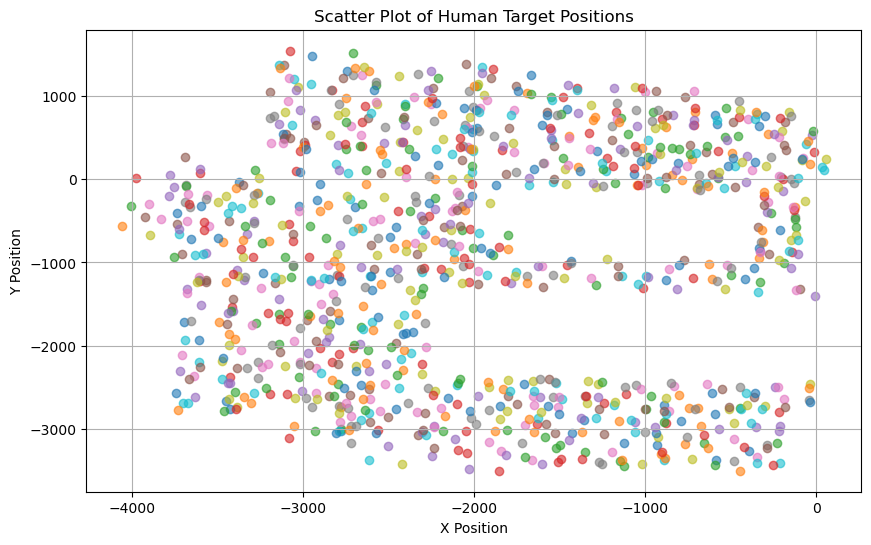

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))  # Définit la taille de la figure

# Si df_Human1_target est un numpy.ndarray, vous pouvez directement utiliser l'indexation
for i in range(len(df_Human1_target)):
    plt.scatter(df_Human1_target[i, 0], df_Human1_target[i, 1], alpha=0.6)

plt.title('Scatter Plot of Human Target Positions')  # Titre du graphique
plt.xlabel('X Position')  # Étiquette pour l'axe des x
plt.ylabel('Y Position')  # Étiquette pour l'axe des y
plt.grid(True)  # Ajoute une grille pour une meilleure lisibilité
plt.show()  # Affiche le graph


### Dimensions

In [18]:
df_Human1_features.shape, df_Human1_target.shape

((1000, 4, 667200), (1000, 2))

## Traitement

In [7]:
import numpy as np

def mean_euclidean_distance(y_true, y_pred):
    """
    Calcule la moyenne de la distance euclidienne entre les prédictions et les vraies valeurs.
    
    :param y_true: array de vraies valeurs
    :param y_pred: array de valeurs prédites
    :return: moyenne de la distance euclidienne
    """
    distances = np.linalg.norm(y_true - y_pred, axis=1)
    return np.mean(distances)


In [8]:
X = df_Human1_features
y = df_Human1_target

### init RMS

In [9]:
X_rms = np.sqrt(np.mean(np.square(X[800:10000]), axis=2))

In [10]:
print(X_rms.shape)

(200, 4)


In [22]:
def calculate_rms_for_range(X, start_index=800, end_index=10000):
    # Extraire la plage spécifique de X
    X_segment = X[:, :, start_index:end_index]

    # Calculer le RMS pour la plage spécifiée
    rms_values = np.sqrt(np.mean(np.square(X_segment), axis=2))

    return rms_values


In [23]:
X_rms_2048 = calculate_rms_for_range(X)
print("Shape of X_rms:", X_rms.shape)


Shape of X_rms: (200, 4)


## Random Baseline

### RMS

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Supposons que 'X' est déjà chargé et prétraité, de même pour 'y'

# Normalisation des caractéristiques pour améliorer les performances du KNN
scaler = StandardScaler()
X_rms = X_rms.reshape(1000,-1)
X_scaled = scaler.fit_transform(X_rms)

# Si la taille des données est petite, utiliser une proportion plus grande pour l'entraînement
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


# Supposons que ceci est votre dataset
y = np.random.rand(1000, 2)  # Remplacez par votre vrai dataset

# Calcul de la moyenne et de l'écart type pour chaque colonne
mean_y = np.mean(y_test, axis=0)
std_y = np.std(y_test, axis=0)

# Génération de 1000 nouvelles observations, chacune ayant 2 valeurs
random_predictions = np.random.normal(loc=mean_y, scale=std_y, size=(200, 2))

# Affichage des prédictions aléatoires
print(random_predictions)

print(random_predictions.shape, y_test.shape)
# Calcul des métriques
mae = mean_absolute_error(y_test, random_predictions)
r2 = r2_score(y_test, random_predictions)
dist_eucl = mean_euclidean_distance(y_test, random_predictions)

print("Mean Absolut Error:", mae)
print("Dist Eucl", dist_eucl)
print("R2 Score:", r2)


[[-1337.0159423  -3805.20120615]
 [-1214.25920408  -299.18477795]
 [ -478.03121973  -147.50587112]
 [-2947.22604734 -1022.14413281]
 [-3321.92687944 -1527.54612529]
 [-1635.46371088 -1812.15065065]
 [-2636.32220483 -2361.64272873]
 [ -501.49473806  -228.31214111]
 [-1682.75989058 -1093.76356635]
 [-1391.53266837 -4280.8964027 ]
 [-2564.12286365  -408.04060931]
 [-2490.41632747   464.40383205]
 [-3879.69439133 -1581.44533489]
 [-2268.53995451  -914.8292895 ]
 [-1411.17244091    32.51829779]
 [-1655.0261856   -112.43040079]
 [-2317.71248982 -1275.17804644]
 [-2761.1800733   -379.2344552 ]
 [-3529.18176899 -2548.09234547]
 [-2002.03693159  -423.49219906]
 [-3591.94872336 -2918.84455446]
 [-4074.57836368 -1219.95427145]
 [-2640.48947085 -4014.74264495]
 [-2031.28612688   478.75467289]
 [-2277.41737373 -2314.59630074]
 [  382.19426784 -3551.54854558]
 [-1891.05174098  -800.94292493]
 [-1513.03617953  -207.22741121]
 [-1868.19333527 -1489.73397038]
 [-3351.95187503   824.05055302]
 [-2352.25

## kNN

### RMS kNN

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Supposons que 'X' est déjà chargé et prétraité, de même pour 'y'

# Normalisation des caractéristiques pour améliorer les performances du KNN
scaler = StandardScaler()
X_rms = X_rms.reshape(1000,-1)
X_scaled = scaler.fit_transform(X_rms)

# Si la taille des données est petite, utiliser une proportion plus grande pour l'entraînement
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Assurer que n_neighbors est inférieur ou égal au nombre d'échantillons dans X_train
n_neighbors = min(5, len(X_train) - 1)  # -1 pour s'assurer d'avoir au moins 1 voisin

# Création du modèle KNN de régression avec un nombre ajusté de voisins
knn_reg = KNeighborsRegressor(n_neighbors=n_neighbors)
knn_reg.fit(X_train, y_train)

# Prédiction sur les données de test
y_pred = knn_reg.predict(X_test)

# Calcul des métriques
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
dist_eucl = mean_euclidean_distance(y_test, y_pred)

print("Mean Absolut Error:", mae)
print("Dist Eucl", dist_eucl)
print("R2 Score:", r2)


Mean Absolut Error: 654.7820467440645
Dist Eucl 1006.6502996984053
R2 Score: 0.5058610572204956


In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Supposons que 'X' est déjà chargé et prétraité, de même pour 'y'

# Normalisation des caractéristiques pour améliorer les performances du KNN
scaler = StandardScaler()
X_rms_2048 = X_rms_2048.reshape(1000,-1)
X_scaled = scaler.fit_transform(X_rms_2048)

# Si la taille des données est petite, utiliser une proportion plus grande pour l'entraînement
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Assurer que n_neighbors est inférieur ou égal au nombre d'échantillons dans X_train
n_neighbors = min(5, len(X_train) - 1)  # -1 pour s'assurer d'avoir au moins 1 voisin

# Création du modèle KNN de régression avec un nombre ajusté de voisins
knn_reg = KNeighborsRegressor(n_neighbors=n_neighbors)
knn_reg.fit(X_train, y_train)

# Prédiction sur les données de test
y_pred = knn_reg.predict(X_test)

# Calcul des métriques
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
dist_eucl = mean_euclidean_distance(y_test, y_pred)

print("Mean Absolut Error:", mae)
print("Dist Eucl", dist_eucl)
print("R2 Score:", r2)


Mean Absolut Error: 539.8843099481301
Dist Eucl 837.1695625286134
R2 Score: 0.6610105868716183


### Varier les Hyperparamètres

1 )
Dist Eucl 1111.8785331794625
Mean Absolut Error: 702.797102309399
R2 Score: 0.27369033427783424 

2 )
Dist Eucl 1021.2878757074712
Mean Absolut Error: 649.2926718934016
R2 Score: 0.42929023686065615 

3 )
Dist Eucl 992.9766270606586
Mean Absolut Error: 641.9108467802764
R2 Score: 0.4793063740266698 

4 )
Dist Eucl 996.7452199055646
Mean Absolut Error: 644.8312754678088
R2 Score: 0.4896757951099408 

5 )
Dist Eucl 1006.6502996984053
Mean Absolut Error: 654.7820467440645
R2 Score: 0.5058610572204956 

6 )
Dist Eucl 1007.8107981297487
Mean Absolut Error: 658.4623340924041
R2 Score: 0.5079208724435484 

7 )
Dist Eucl 1016.9978268265276
Mean Absolut Error: 664.7633732177617
R2 Score: 0.5010438349216728 

8 )
Dist Eucl 1030.6641752590454
Mean Absolut Error: 671.1277902535751
R2 Score: 0.49285838155811484 

9 )
Dist Eucl 1032.8045683788018
Mean Absolut Error: 672.8724170930866
R2 Score: 0.49624285929568285 



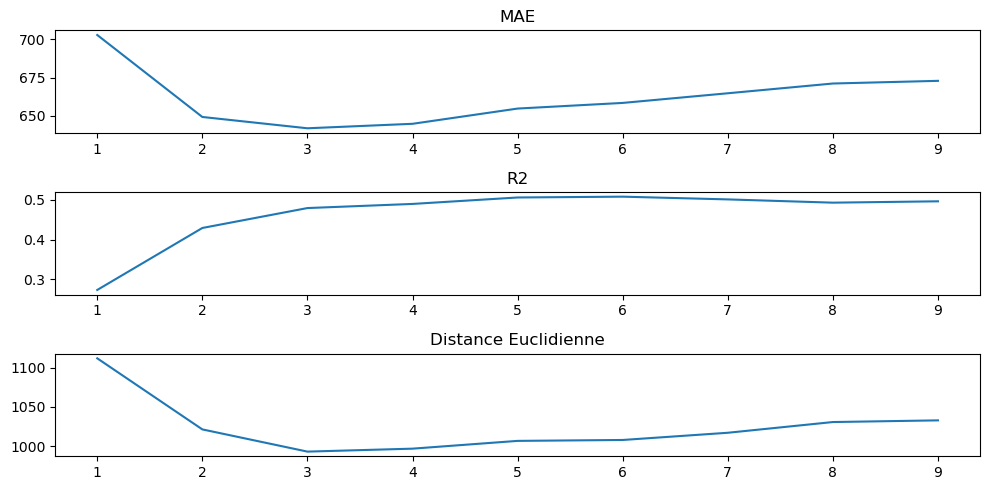

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt

# Supposons que 'X' est déjà chargé et prétraité, de même pour 'y'

# Normalisation des caractéristiques pour améliorer les performances du KNN
scaler = StandardScaler()
X_rms = X_rms.reshape(1000,-1)
X_scaled = scaler.fit_transform(X_rms)

# Si la taille des données est petite, utiliser une proportion plus grande pour l'entraînement
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

KNN_i_mae = [None]
KNN_i_r2 = [None]
KNN_i_euc = [None]

# Assurer que n_neighbors est inférieur ou égal au nombre d'échantillons dans X_train
for i in range(1,10):
    n_neighbors = min(i, len(X_train) - 1)  # -1 pour s'assurer d'avoir au moins 1 voisin

    # Création du modèle KNN de régression avec un nombre ajusté de voisins
    knn_reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    knn_reg.fit(X_train, y_train)

    # Prédiction sur les données de test
    y_pred = knn_reg.predict(X_test)

    # Calcul des métriques
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    dist_eucl = mean_euclidean_distance(y_test, y_pred)

    print(i,")\nDist Eucl", dist_eucl)
    print("Mean Absolut Error:", mae)
    print("R2 Score:", r2,'\n')

    KNN_i_mae.append(mae)
    KNN_i_r2.append(r2)
    KNN_i_euc.append(dist_eucl)

plt.figure(figsize=(10,5))
plt.subplot(3,1,1)
plt.title("MAE")
plt.plot(KNN_i_mae)

plt.subplot(3,1,2)
plt.title("R2")
plt.plot(KNN_i_r2)

plt.subplot(3,1,3)
plt.title("Distance Euclidienne")
plt.plot(KNN_i_euc)
plt.tight_layout()

**On remarque ici que le meilleure à choisir est le k=3**

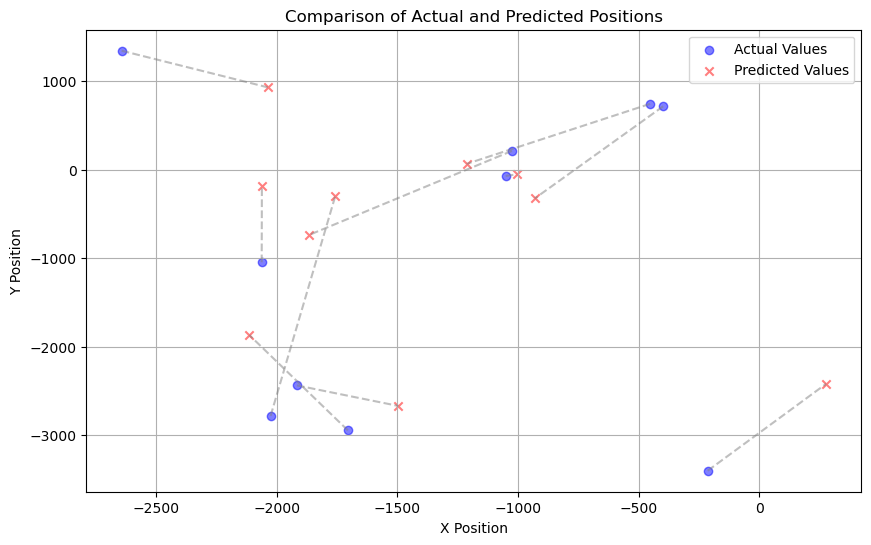

In [69]:
plt.figure(figsize=(10, 6))  # Définit la taille de la figure
plt.scatter(y_test[:10, 0], y_test[:10, 1], color='blue', label='Actual Values', marker='o', alpha=0.5)  # Tracé des valeurs réelles
plt.scatter(y_pred[:10, 0], y_pred[:10, 1], color='red', label='Predicted Values', marker='x', alpha=0.5)  # Tracé des valeurs prédites

# Pour chaque point, tracer une ligne reliant la valeur réelle à la valeur prédite
for actual, predicted in zip(y_test[:10,], y_pred[:10,]):
    plt.plot([actual[0], predicted[0]], [actual[1], predicted[1]], 'gray', linestyle='--', alpha=0.5)  # Ligne grise pour relier les points

plt.title('Comparison of Actual and Predicted Positions')  # Ajoute un titre au graphique
plt.xlabel('X Position')  # Nomme l'axe des x
plt.ylabel('Y Position')  # Nomme l'axe des y
plt.legend()  # Ajoute une légende pour distinguer les séries
plt.grid(True)  # Affiche une grille pour une meilleure lisibilité
plt.show()  # Affiche le graphique


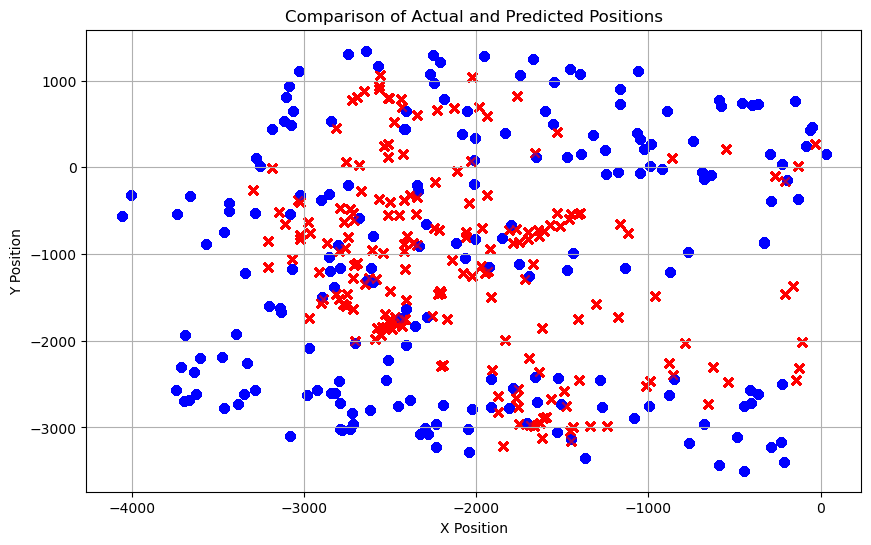

In [99]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))  # Définit la taille de la figure

# Si df_Human1_target est un numpy.ndarray, vous pouvez directement utiliser l'indexation
for i in range(len(df_Human1_target)):
    plt.scatter(y_test[:, 0], y_test[:, 1], color='blue', label='Actual Values', marker='o', alpha=0.5)
    plt.scatter(y_pred[:, 0], y_pred[:, 1], color='red', label='Predicted Values', marker='x', alpha=0.5)

plt.title('Comparison of Actual and Predicted Positions')  # Titre du graphique
plt.xlabel('X Position')  # Étiquette pour l'axe des x
plt.ylabel('Y Position')  # Étiquette pour l'axe des y
plt.grid(True)  # Ajoute une grille pour une meilleure lisibilité
plt.show()  # Affiche le graph


### (RMS - RMS_Empty) KNN 

In [231]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Supposons que 'X' est déjà chargé et prétraité, de même pour 'y'

# Normalisation des caractéristiques pour améliorer les performances du KNN
scaler = StandardScaler()
X_rms = X_rms.reshape(1000,-1)
X_rms_Empty = X_rms_Empty.reshape(100,-1)
X_scaled = scaler.fit_transform(X_rms)
X_scaled_Empty = scaler.fit_transform(X_rms_Empty)
for i in range(100):
    X_scaled[i][:][:]  = X_scaled[i][:][:] - np.mean(X_scaled_Empty[:])

# Si la taille des données est petite, utiliser une proportion plus grande pour l'entraînement
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Assurer que n_neighbors est inférieur ou égal au nombre d'échantillons dans X_train
n_neighbors = min(5, len(X_train) - 1)  # -1 pour s'assurer d'avoir au moins 1 voisin

# Création du modèle KNN de régression avec un nombre ajusté de voisins
knn_reg = KNeighborsRegressor(n_neighbors=n_neighbors)
knn_reg.fit(X_train, y_train)

# Prédiction sur les données de test
y_pred = knn_reg.predict(X_test)

# Calcul des métriques
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
dist_eucl = mean_euclidean_distance(y_test, y_pred)

print("Mean Absolut Error:", mae)
print("Dist Eucl", dist_eucl)
print("R2 Score:", r2)


Mean Absolut Error: 654.7820467440645
Dist Eucl 1006.6502996984053
R2 Score: 0.5058610572204956


### (RMS - RMS_Empty) Calibred KNN 

In [232]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Supposons que 'X' est déjà chargé et prétraité, de même pour 'y'

# Normalisation des caractéristiques pour améliorer les performances du KNN
scaler = StandardScaler()
X_rms = X_rms.reshape(1000,-1)
X_rms_Empty_Calibred = X_rms_Empty_Calibred.reshape(100,-1)
X_scaled = scaler.fit_transform(X_rms)
X_scaled_Empty_Calibred = scaler.fit_transform(X_rms_Empty_Calibred)
for i in range(100):
    X_scaled[i][:][:]  = X_scaled[i][:][:] - np.mean(X_scaled_Empty_Calibred[:])

# Si la taille des données est petite, utiliser une proportion plus grande pour l'entraînement
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Assurer que n_neighbors est inférieur ou égal au nombre d'échantillons dans X_train
n_neighbors = min(5, len(X_train) - 1)  # -1 pour s'assurer d'avoir au moins 1 voisin

# Création du modèle KNN de régression avec un nombre ajusté de voisins
knn_reg = KNeighborsRegressor(n_neighbors=n_neighbors)
knn_reg.fit(X_train, y_train)

# Prédiction sur les données de test
y_pred = knn_reg.predict(X_test)

# Calcul des métriques
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
dist_eucl = mean_euclidean_distance(y_test, y_pred)

print("Mean Absolut Error:", mae)
print("Dist Eucl", dist_eucl)
print("R2 Score:", r2)


Mean Absolut Error: 654.7820467440645
Dist Eucl 1006.6502996984053
R2 Score: 0.5058610572204956


### PCA kNN

In [30]:
from sklearn.decomposition import PCA

# Vous pourriez avoir besoin de remodeler vos données pour PCA
X_reshaped = X.reshape(1000, -1)  # De (1000, 4, 667200) à (1000, 2668800)
pca = PCA(n_components=200)  # 50Réduire à 100 composantes principales
X_pca = pca.fit_transform(X_reshaped)

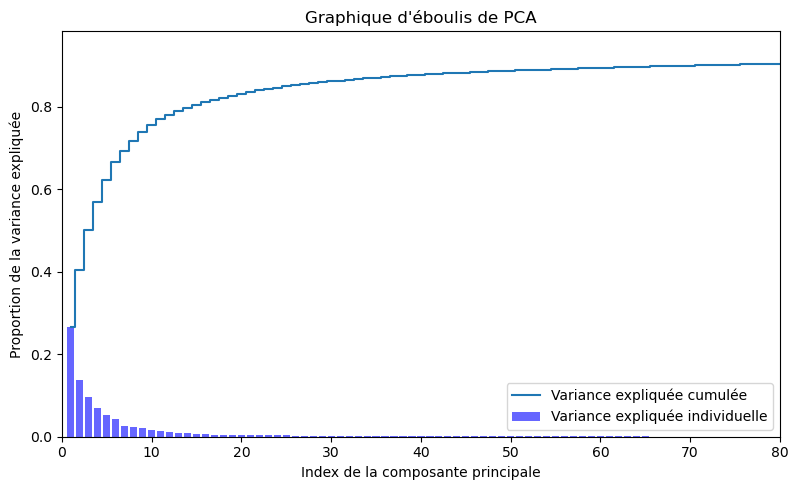

In [37]:
import matplotlib.pyplot as plt

# Pourcentage de la variance expliquée par chaque composante
variance_explained = pca.explained_variance_ratio_

# Tracer le graphique d'éboulis
plt.figure(figsize=(8, 5))
plt.bar(range(1, len(variance_explained)+1), variance_explained, alpha=0.6, color='b', label='Variance expliquée individuelle')
plt.step(range(1, len(variance_explained)+1), np.cumsum(variance_explained), where='mid', label='Variance expliquée cumulée')
plt.ylabel('Proportion de la variance expliquée')
plt.xlabel('Index de la composante principale')
plt.title('Graphique d\'éboulis de PCA')
plt.legend(loc='best')
plt.tight_layout()
plt.xlim(0,80)
plt.show()


Dist Eucl 771.5804037187133
Mean Absolut Error: 479.08354828190454
R2 Score: 0.7022598701912792
Dist Eucl 747.9076542156574
Mean Absolut Error: 460.4620883175678
R2 Score: 0.7322899962507432
Dist Eucl 735.4076762967093
Mean Absolut Error: 451.9991210691195
R2 Score: 0.7362234293292288
Dist Eucl 719.3687957647428
Mean Absolut Error: 440.6347392793711
R2 Score: 0.7479860114728766
Dist Eucl 744.2685860791427
Mean Absolut Error: 457.5110434038219
R2 Score: 0.7252811339679572
Dist Eucl 723.7875017793191
Mean Absolut Error: 444.63849885971774
R2 Score: 0.7364667619960176
Dist Eucl 716.5414898397457
Mean Absolut Error: 441.21437361130575
R2 Score: 0.7385507847287349
Dist Eucl 715.9678718687278
Mean Absolut Error: 441.190572021359
R2 Score: 0.7402995033210493
Dist Eucl 701.1248651344882
Mean Absolut Error: 433.54233648093145
R2 Score: 0.7507466892687491
Dist Eucl 699.2345926616453
Mean Absolut Error: 430.37760087464505
R2 Score: 0.750042893928712
Dist Eucl 695.226785985998
Mean Absolut Error: 

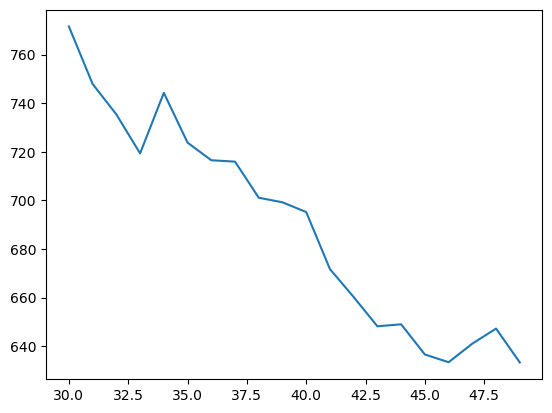

In [40]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

pca_var = []
# Vous pourriez avoir besoin de remodeler vos données pour PCA
X_reshaped = X.reshape(1000, -1)  # De (1000, 4, 667200) à (1000, 2668800)
for i in range(30,50):
    pca = PCA(n_components=i)  
    X_pca = pca.fit_transform(X_reshaped)


    # Normalisation des caractéristiques pour améliorer les performances du KNN
    scaler = StandardScaler()
    X_pca = X_pca.reshape(1000,-1)
    X_scaled = scaler.fit_transform(X_pca)

    # Si la taille des données est petite, utiliser une proportion plus grande pour l'entraînement
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

    # Assurer que n_neighbors est inférieur ou égal au nombre d'échantillons dans X_train
    n_neighbors = min(5, len(X_train) - 1)  # -1 pour s'assurer d'avoir au moins 1 voisin

    # Création du modèle KNN de régression avec un nombre ajusté de voisins
    knn_reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    knn_reg.fit(X_train, y_train)

    # Prédiction sur les données de test
    y_pred = knn_reg.predict(X_test)

    # Calcul des métriques
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    dist_eucl = mean_euclidean_distance(y_test, y_pred)

    print(i,"/\nDist Eucl", dist_eucl)
    print("Mean Absolut Error:", mae)
    print("R2 Score:", r2)

    pca_var.append(dist_eucl)

plt.plot(range(30,50),pca_var)

In [234]:
from sklearn.decomposition import PCA
 
X_reshaped = X.reshape(1000, -1)  # De (1000, 4, 667200) à (1000, 2668800)
pca = PCA(n_components=50)  # 50Réduire à 100 composantes principales
X_pca = pca.fit_transform(X_reshaped)


In [40]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Supposons que 'X' est déjà chargé et prétraité, de même pour 'y'

# Normalisation des caractéristiques pour améliorer les performances du KNN
scaler = StandardScaler()
X_pca = X_pca.reshape(1000,-1)
X_scaled = scaler.fit_transform(X_pca)

# Si la taille des données est petite, utiliser une proportion plus grande pour l'entraînement
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Assurer que n_neighbors est inférieur ou égal au nombre d'échantillons dans X_train
n_neighbors = min(5, len(X_train) - 1)  # -1 pour s'assurer d'avoir au moins 1 voisin

# Création du modèle KNN de régression avec un nombre ajusté de voisins
knn_reg = KNeighborsRegressor(n_neighbors=n_neighbors)
knn_reg.fit(X_train, y_train)

# Prédiction sur les données de test
y_pred = knn_reg.predict(X_test)

# Calcul des métriques
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
dist_eucl = mean_euclidean_distance(y_test, y_pred)

print("Dist Eucl", dist_eucl)
print("Mean Absolut Error:", mae)
print("R2 Score:", r2)



Dist Eucl 634.8568227567569
Mean Absolut Error: 394.62748439218126
R2 Score: 0.7567340929032575


In [37]:
import numpy as np
from sklearn.decomposition import PCA

# Définissez les indices de début et de fin
start_index = 800
end_index = 10000

# Extraire la plage spécifique et redimensionner pour PCA
X_segment = X[:, :, start_index:end_index]  # Extraction de la plage
X_reshaped = X_segment.reshape(X.shape[0], -1)  # Redimensionnement de (1000, 4, 9200) à (1000, 36800)

# Création de l'objet PCA et réduction de dimension
pca = PCA(n_components=50)
X_pca = pca.fit_transform(X_reshaped)

# Affichage de la nouvelle forme des données
print("Shape of X_pca:", X_pca.shape)

# Affichage de la variance expliquée
print("Explained variance ratio:", pca.explained_variance_ratio_)
print("Sum of explained variance ratio:", sum(pca.explained_variance_ratio_))


Shape of X_pca: (1000, 50)
Explained variance ratio: [0.1954449  0.15856026 0.10013934 0.07876815 0.06127613 0.05117293
 0.03111206 0.0281044  0.02461576 0.01877559 0.01679582 0.01273362
 0.01034188 0.00916721 0.00777712 0.00654755 0.00612269 0.00602613
 0.00564885 0.00507603 0.00480997 0.00410685 0.00370715 0.00333685
 0.00282515 0.00272668 0.00245735 0.00228198 0.00224704 0.00208552
 0.00192674 0.00182938 0.00174225 0.00168118 0.001508   0.00148335
 0.00143145 0.00129917 0.00127122 0.00114123 0.00110628 0.00109064
 0.00102178 0.00097467 0.00094537 0.00091047 0.0008714  0.00086085
 0.00085341 0.00078262]
Sum of explained variance ratio: 0.8895224120351486


In [36]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Supposons que 'X' est déjà chargé et prétraité, de même pour 'y'

# Normalisation des caractéristiques pour améliorer les performances du KNN
scaler = StandardScaler()
X_pca = X_pca.reshape(1000,-1)
X_scaled = scaler.fit_transform(X_pca)

# Si la taille des données est petite, utiliser une proportion plus grande pour l'entraînement
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Assurer que n_neighbors est inférieur ou égal au nombre d'échantillons dans X_train
n_neighbors = min(5, len(X_train) - 1)  # -1 pour s'assurer d'avoir au moins 1 voisin

# Création du modèle KNN de régression avec un nombre ajusté de voisins
knn_reg = KNeighborsRegressor(n_neighbors=n_neighbors)
knn_reg.fit(X_train, y_train)

# Prédiction sur les données de test
y_pred = knn_reg.predict(X_test)

# Calcul des métriques
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
dist_eucl = mean_euclidean_distance(y_test, y_pred)

print("Dist Eucl", dist_eucl)
print("Mean Absolut Error:", mae)
print("R2 Score:", r2)



Dist Eucl 726.2538286847941
Mean Absolut Error: 444.0339267378778
R2 Score: 0.7184226992753537


In [254]:
from sklearn.decomposition import PCA
 
X_reshaped = combined_features.reshape(1104, -1)  # De (1104, 4, 667200) à (1104, 2668800)
pca = PCA(n_components=50)  # 50Réduire à 100 composantes principales
X_pca = pca.fit_transform(X_reshaped)


In [264]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Supposons que 'X' est déjà chargé et prétraité, de même pour 'y'


# Normalisation des caractéristiques pour améliorer les performances du KNN
scaler = StandardScaler()
X_pca = X_pca.reshape(1104,-1)
X_scaled = scaler.fit_transform(X_pca)

# Si la taille des données est petite, utiliser une proportion plus grande pour l'entraînement
X_train, X_test, y_train, y_test = train_test_split(X_scaled, combined_target, test_size=0.2, random_state=42)

# Assurer que n_neighbors est inférieur ou égal au nombre d'échantillons dans X_train
n_neighbors = min(5, len(X_train) - 1)  # -1 pour s'assurer d'avoir au moins 1 voisin

# Création du modèle KNN de régression avec un nombre ajusté de voisins
knn_reg = KNeighborsRegressor(n_neighbors=n_neighbors)
knn_reg.fit(X_train, y_train)

# Prédiction sur les données de test
y_pred = knn_reg.predict(X_test)

# Calcul des métriques
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
dist_eucl = mean_euclidean_distance(y_test, y_pred)

print("Dist Eucl", dist_eucl)
print("Mean Absolut Error:", mae)
print("R2 Score:", r2)



Dist Eucl 629.9240255706236
Mean Absolut Error: 384.9913474411152
R2 Score: 0.7619763107916804


In [1]:
from sklearn.decomposition import PCA
 
X_reshaped = combined_features[:][:][800:10000].reshape(1104, -1)  # De (1104, 4, 667200) à (1104, 2668800)
pca = PCA(n_components=50)  # 50Réduire à 100 composantes principales
X_pca = pca.fit_transform(X_reshaped)


NameError: name 'combined_features' is not defined

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Supposons que 'X' est déjà chargé et prétraité, de même pour 'y'


# Normalisation des caractéristiques pour améliorer les performances du KNN
scaler = StandardScaler()
X_pca = X_pca.reshape(1104,-1)
X_scaled = scaler.fit_transform(X_pca)

# Si la taille des données est petite, utiliser une proportion plus grande pour l'entraînement
X_train, X_test, y_train, y_test = train_test_split(X_scaled, combined_target, test_size=0.2, random_state=42)

# Assurer que n_neighbors est inférieur ou égal au nombre d'échantillons dans X_train
n_neighbors = min(5, len(X_train) - 1)  # -1 pour s'assurer d'avoir au moins 1 voisin

# Création du modèle KNN de régression avec un nombre ajusté de voisins
knn_reg = KNeighborsRegressor(n_neighbors=n_neighbors)
knn_reg.fit(X_train, y_train)

# Prédiction sur les données de test
y_pred = knn_reg.predict(X_test)

# Calcul des métriques
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
dist_eucl = mean_euclidean_distance(y_test, y_pred)

print("Dist Eucl", dist_eucl)
print("Mean Absolut Error:", mae)
print("R2 Score:", r2)



**PCA better than RMS**

In [116]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Supposons que 'X' est déjà chargé et prétraité, de même pour 'y'

# Normalisation des caractéristiques pour améliorer les performances du KNN
scaler = StandardScaler()
X_pca = X_pca.reshape(1000,-1)
X_pca_Empty = X_pca_Empty.reshape(100,-1)
X_scaled = scaler.fit_transform(X_pca)
X_scaled_Empty = scaler.fit_transform(X_pca_Empty)
X_scaled[:][:][0]  = X_scaled[:][:][0] - X_scaled_Empty[:][:][0]

# Si la taille des données est petite, utiliser une proportion plus grande pour l'entraînement
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Assurer que n_neighbors est inférieur ou égal au nombre d'échantillons dans X_train
n_neighbors = min(5, len(X_train) - 1)  # -1 pour s'assurer d'avoir au moins 1 voisin

# Création du modèle KNN de régression avec un nombre ajusté de voisins
knn_reg = KNeighborsRegressor(n_neighbors=n_neighbors)
knn_reg.fit(X_train, y_train)

# Prédiction sur les données de test
y_pred = knn_reg.predict(X_test)

# Calcul des métriques
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
dist_eucl = mean_euclidean_distance(y_test, y_pred)

print("Dist Eucl", dist_eucl)
print("Mean Absolut Error:", mae)
print("R2 Score:", r2)



Dist Eucl 647.1987501831296
Mean Absolut Error: 395.26105325218936
R2 Score: 0.7688884732336395


## LLE KNN

In [ ]:
from sklearn.manifold import LocallyLinearEmbedding

# Configuration de LLE
lle = LocallyLinearEmbedding(n_neighbors=2, n_components=2, method='standard', eigen_solver='auto')


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Supposons que 'X' est déjà chargé et prétraité, de même pour 'y'

# Normalisation des caractéristiques pour améliorer les performances du KNN
scaler = StandardScaler()
X_lle = X.reshape(1000,-1)
X_scaled = scaler.fit_transform(X_lle)

# Si la taille des données est petite, utiliser une proportion plus grande pour l'entraînement
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Assurer que n_neighbors est inférieur ou égal au nombre d'échantillons dans X_train
n_neighbors = min(5, len(X_train) - 1)  # -1 pour s'assurer d'avoir au moins 1 voisin

# Création du modèle KNN de régression avec un nombre ajusté de voisins
knn_reg = KNeighborsRegressor(n_neighbors=n_neighbors)
knn_reg.fit(X_train, y_train)

# Prédiction sur les données de test
y_pred = knn_reg.predict(X_test)

# Calcul des métriques
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
dist_eucl = mean_euclidean_distance(y_test, y_pred)

print("Dist Eucl", dist_eucl)
print("Mean Absolut Error:", mae)
print("R2 Score:", r2)



: 

: 

### Neighbors Comparaison

1 )
Dist Eucl 598.826232859623
Mean Absolut Error: 370.400818921412
R2 Score: 0.7282668647018995 

2 )
Dist Eucl 564.3008854921783
Mean Absolut Error: 350.4140081506324
R2 Score: 0.786307564239584 

3 )
Dist Eucl 565.7608996263693
Mean Absolut Error: 352.9929746909845
R2 Score: 0.7915985269771343 

4 )
Dist Eucl 587.2825664858661
Mean Absolut Error: 367.39048403911045
R2 Score: 0.7780968317368251 

5 )
Dist Eucl 634.8568227567569
Mean Absolut Error: 394.62748439218126
R2 Score: 0.7567340929032575 

6 )
Dist Eucl 671.0488937754978
Mean Absolut Error: 418.9176979493851
R2 Score: 0.7282539660209142 

7 )
Dist Eucl 714.1823737184858
Mean Absolut Error: 448.7573083367819
R2 Score: 0.70266500001372 

8 )
Dist Eucl 749.9055052433251
Mean Absolut Error: 471.7141786891416
R2 Score: 0.6815146654144603 

9 )
Dist Eucl 781.8626188264446
Mean Absolut Error: 492.5297157797033
R2 Score: 0.6637382529588831 



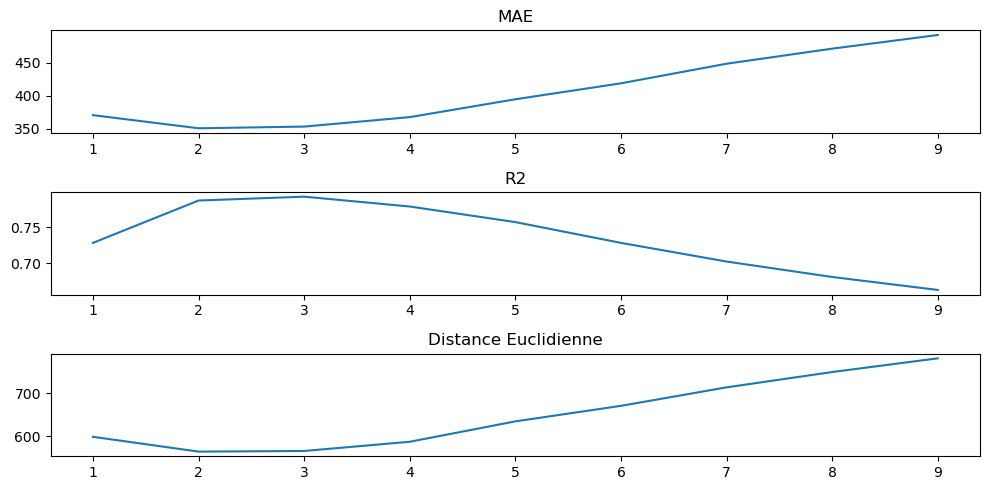

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt

# Supposons que 'X' est déjà chargé et prétraité, de même pour 'y'

# Normalisation des caractéristiques pour améliorer les performances du KNN
scaler = StandardScaler()
X_pca = X_pca.reshape(1000,-1)
X_scaled = scaler.fit_transform(X_pca)

# Si la taille des données est petite, utiliser une proportion plus grande pour l'entraînement
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

KNN_i_mae = [None]
KNN_i_r2 = [None]
KNN_i_euc = [None]

# Assurer que n_neighbors est inférieur ou égal au nombre d'échantillons dans X_train
for i in range(1,10):
    n_neighbors = min(i, len(X_train) - 1)  # -1 pour s'assurer d'avoir au moins 1 voisin

    # Création du modèle KNN de régression avec un nombre ajusté de voisins
    knn_reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    knn_reg.fit(X_train, y_train)

    # Prédiction sur les données de test
    y_pred = knn_reg.predict(X_test)

    # Calcul des métriques
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    dist_eucl = mean_euclidean_distance(y_test, y_pred)

    print(i,")\nDist Eucl", dist_eucl)
    print("Mean Absolut Error:", mae)
    print("R2 Score:", r2,'\n')

    KNN_i_mae.append(mae)
    KNN_i_r2.append(r2)
    KNN_i_euc.append(dist_eucl)

plt.figure(figsize=(10,5))
plt.subplot(3,1,1)
plt.title("MAE")
plt.plot(KNN_i_mae)

plt.subplot(3,1,2)
plt.title("R2")
plt.plot(KNN_i_r2)

plt.subplot(3,1,3)
plt.title("Distance Euclidienne")
plt.plot(KNN_i_euc)
plt.tight_layout()

### UMAP kNN

In [251]:
import umap
import numpy as np
import matplotlib.pyplot as plt

# Supposons que 'X' est votre matrice de données initiale
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X.reshape(1000, -1))  # Assurez-vous que X est correctement redimensionné si nécessaire

umap_reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2, random_state=42)
X_umap = umap_reducer.fit_transform(X_scaled)

plt.figure(figsize=(12, 10))
plt.scatter(X_umap[:, 0], X_umap[:, 1], s=5, cmap='Spectral')
plt.title('UMAP projection of the Dataset', fontsize=18)
plt.xlabel('UMAP1', fontsize=14)
plt.ylabel('UMAP2', fontsize=14)
plt.colorbar(label='Classes')
plt.show()


ModuleNotFoundError: No module named 'umap'

In [76]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Supposons que 'X' est déjà chargé et prétraité, de même pour 'y'

# Normalisation des caractéristiques pour améliorer les performances du KNN
scaler = StandardScaler()
X_umap = X_umap.reshape(1000,-1)
X_scaled = scaler.fit_transform(X_umap)

# Si la taille des données est petite, utiliser une proportion plus grande pour l'entraînement
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Assurer que n_neighbors est inférieur ou égal au nombre d'échantillons dans X_train
n_neighbors = min(5, len(X_train) - 1)  # -1 pour s'assurer d'avoir au moins 1 voisin

# Création du modèle KNN de régression avec un nombre ajusté de voisins
knn_reg = KNeighborsRegressor(n_neighbors=n_neighbors)
knn_reg.fit(X_train, y_train)

# Prédiction sur les données de test
y_pred = knn_reg.predict(X_test)

# Calcul des métriques
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
dist_eucl = mean_euclidean_distance(y_test, y_pred)

print("Mean Absolut Error:", mae)
print("Dist Eucl", dist_eucl)
print("R2 Score:", r2)


Mean Absolut Error: 937.3516085911363
Dist Eucl 1467.4055085423138
R2 Score: 0.14147512757694036


## Linear Regression

### RMS LinearRegression

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Supposons que 'X_rms' est déjà calculé et prêt à être utilisé, de même pour 'y'

# Normalisation des caractéristiques pour améliorer les performances du modèle de régression
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_rms)  # Assurez-vous que X_rms est déjà reshaped si nécessaire

# Division des données en un jeu d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Création du modèle de régression linéaire
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Prédiction sur les données de test
y_pred = lin_reg.predict(X_test)

# Calcul des métriques
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
dist_eucl = mean_euclidean_distance(y_test, y_pred)

print("Dist Eucl", dist_eucl)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R2 Score:", r2)


Dist Eucl 1544.234908824
Mean Squared Error: 1379956.1731800777
Mean Absolute Error: 994.9644834742676
R2 Score: 0.16508653701175757


In [63]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Supposons que 'X_rms' est déjà calculé et prêt à être utilisé, de même pour 'y'

# Normalisation des caractéristiques pour améliorer les performances du modèle de régression
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_rms_2048)  # Assurez-vous que X_rms est déjà reshaped si nécessaire

# Division des données en un jeu d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Création du modèle de régression linéaire
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Prédiction sur les données de test
y_pred = lin_reg.predict(X_test)

# Calcul des métriques
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
dist_eucl = mean_euclidean_distance(y_test, y_pred)

print("Dist Eucl", dist_eucl)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R2 Score:", r2)


Dist Eucl 1334.522903318805
Mean Squared Error: 1094989.5617386324
Mean Absolute Error: 841.8183865554142
R2 Score: 0.3463834130579186


### PCA LinearRegression

In [66]:
from sklearn.decomposition import PCA

# Vous pourriez avoir besoin de remodeler vos données pour PCA
X_reshaped = X.reshape(1000, -1)  # De (1000, 4, 667200) à (1000, 2668800)
pca = PCA(n_components=100)  # 50Réduire à 100 composantes principales
X_pca = pca.fit_transform(X_reshaped)

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Supposons que 'X_rms' est déjà calculé et prêt à être utilisé, de même pour 'y'

# Normalisation des caractéristiques pour améliorer les performances du modèle de régression
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_pca)  # Assurez-vous que X_rms est déjà reshaped si nécessaire

# Division des données en un jeu d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Création du modèle de régression linéaire
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Prédiction sur les données de test
y_pred = lin_reg.predict(X_test)

# Calcul des métriques
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
dist_eucl = mean_euclidean_distance(y_test, y_pred)

print("Dist Eucl", dist_eucl)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R2 Score:", r2)


Dist Eucl 665.2986697090212
Mean Squared Error: 327879.0607701482
Mean Absolute Error: 417.8287630624493
R2 Score: 0.787218980987981


### UMAP LinearRegression

In [68]:
!pip install umap-learn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 5.8 MB/s eta 0:00:00


/opt/mamba/lib/python3.11/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/tmp/ipykernel_72372/254764639.py:15: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_umap[:, 0], X_umap[:, 1], s=5, cmap='Spectral')


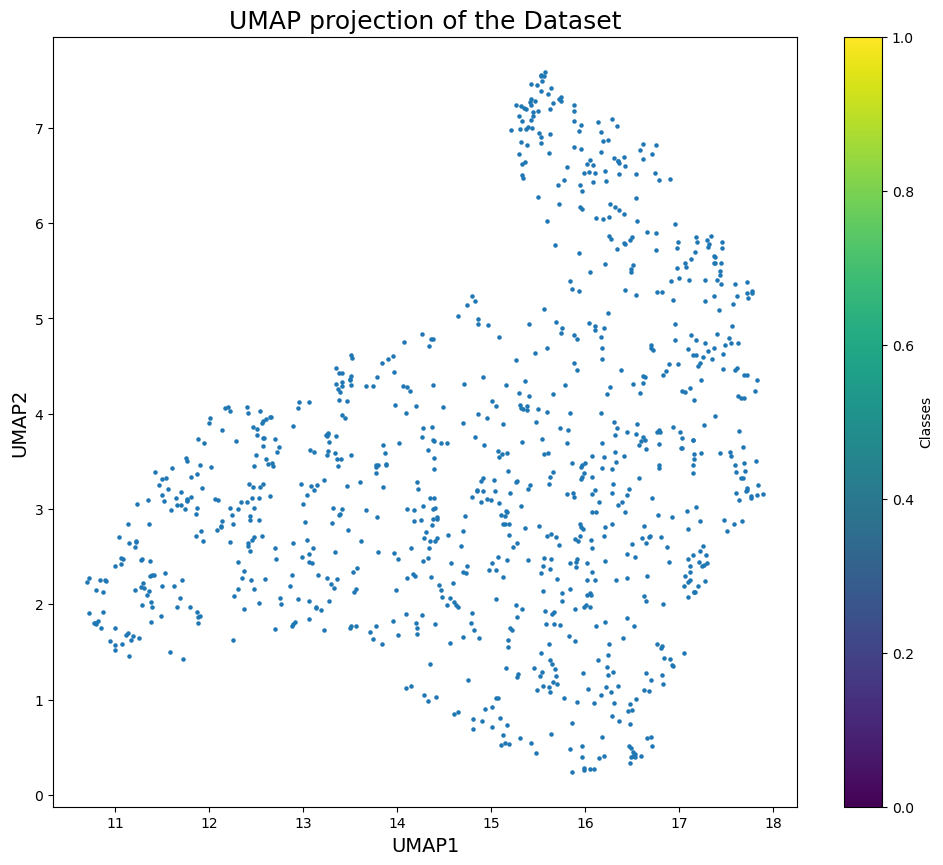

In [69]:
import umap
import numpy as np
import matplotlib.pyplot as plt

# Supposons que 'X' est votre matrice de données initiale
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X.reshape(1000, -1))  # Assurez-vous que X est correctement redimensionné si nécessaire

umap_reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2, random_state=42)
X_umap = umap_reducer.fit_transform(X_scaled)

plt.figure(figsize=(12, 10))
plt.scatter(X_umap[:, 0], X_umap[:, 1], s=5, cmap='Spectral')
plt.title('UMAP projection of the Dataset', fontsize=18)
plt.xlabel('UMAP1', fontsize=14)
plt.ylabel('UMAP2', fontsize=14)
plt.colorbar(label='Classes')
plt.show()


In [70]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Supposons que X_umap est déjà calculé et prêt à être utilisé, de même pour 'y'

# Normalisation des caractéristiques pour améliorer les performances du modèle de régression
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_umap) 

# Division des données en un jeu d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Création du modèle de régression linéaire
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Prédiction sur les données de test
y_pred = lin_reg.predict(X_test)

# Calcul des métriques
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
dist_eucl = mean_euclidean_distance(y_test, y_pred)

print("Dist Eucl", dist_eucl)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R2 Score:", r2)


Dist Eucl 1650.763463004464
Mean Squared Error: 1549972.521348854
Mean Absolute Error: 1068.460925392144
R2 Score: 0.03322613326245755


### Zero Cross Entropy LinearRegression

In [71]:
!pip install librosa

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.7/253.7 kB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.0/63.0 kB 13.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 36.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 49.3 MB/s eta 0:00:00


In [72]:
import librosa
import numpy as np

# Supposons que X est votre dataset où chaque ligne est un signal audio
# Vous pourriez avoir besoin de charger vos données audio ici, par exemple en utilisant librosa.load si X n'est pas déjà un signal

# Calcul du Zero Crossing Rate pour chaque échantillon
def calculate_zero_crossing_rates(X):
    zcrs = np.array([librosa.feature.zero_crossing_rate(x)[0, 0] for x in X])
    return zcrs

# Supposons que chaque ligne de X est déjà un signal audio
X_zero = calculate_zero_crossing_rates(X)


In [74]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Supposons que X_umap est déjà calculé et prêt à être utilisé, de même pour 'y'

# Normalisation des caractéristiques pour améliorer les performances du modèle de régression
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_zero) 

# Division des données en un jeu d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Création du modèle de régression linéaire
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Prédiction sur les données de test
y_pred = lin_reg.predict(X_test)

# Calcul des métriques
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
dist_eucl = mean_euclidean_distance(y_test, y_pred)

print("Dist Eucl", dist_eucl)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R2 Score:", r2)


Dist Eucl 3285.7585790424446
Mean Squared Error: 6925186.558333004
Mean Absolute Error: 2057.916855954308
R2 Score: -3.3059713891987186


# XGBOOST

In [120]:
import numpy as np

# Calcul des statistiques descriptives pour chaque enregistrement
def extract_features(data):
    means = np.mean(data, axis=2)
    stds = np.std(data, axis=2)
    maxs = np.max(data, axis=2)
    mins = np.min(data, axis=2)
    features = np.concatenate([means, stds, maxs, mins], axis=1)
    return features

# Application de la fonction d'extraction de caractéristiques
features = extract_features(df_Human1_features)
targets = df_Human1_target

# Split des données
train_x, test_x, train_y, test_y = train_test_split(features, targets, test_size=0.2, random_state=42)

# Conversion en DMatrix pour XGBoost
import xgboost as xgb
dtrain = xgb.DMatrix(train_x, label=train_y)
dtest = xgb.DMatrix(test_x, label=test_y)

# Configuration du modèle
params = {
    'max_depth': 5,
    'eta': 0.1,
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse'
}

# Entraînement du modèle
num_round = 100
bst = xgb.train(params, dtrain, num_round, evals=[(dtest, 'test')], early_stopping_rounds=10)

# Évaluation
y_pred = bst.predict(dtest)

# Calcul des métriques
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
dist_eucl = mean_euclidean_distance(y_test, y_pred)

print("Dist Eucl", dist_eucl)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R2 Score:", r2)


[0]	test-rmse:1283.36652
[1]	test-rmse:1230.26119
[2]	test-rmse:1185.95999
[3]	test-rmse:1139.84448
[4]	test-rmse:1104.94549
[5]	test-rmse:1075.36594
[6]	test-rmse:1043.96639
[7]	test-rmse:1020.08404
[8]	test-rmse:995.90798
[9]	test-rmse:973.12745
[10]	test-rmse:956.91569
[11]	test-rmse:938.26020
[12]	test-rmse:922.07674
[13]	test-rmse:909.87341
[14]	test-rmse:895.98003
[15]	test-rmse:883.69413
[16]	test-rmse:875.98293
[17]	test-rmse:863.39427
[18]	test-rmse:856.61475
[19]	test-rmse:846.41405
[20]	test-rmse:842.25741
[21]	test-rmse:836.80980
[22]	test-rmse:832.51281
[23]	test-rmse:824.31758
[24]	test-rmse:820.16148
[25]	test-rmse:815.04129
[26]	test-rmse:811.18241
[27]	test-rmse:806.75728
[28]	test-rmse:803.28752
[29]	test-rmse:801.75871
[30]	test-rmse:800.62016
[31]	test-rmse:799.05297
[32]	test-rmse:796.85322
[33]	test-rmse:794.24459
[34]	test-rmse:793.29731
[35]	test-rmse:790.58934
[36]	test-rmse:789.45405
[37]	test-rmse:788.48706
[38]	test-rmse:787.61217
[39]	test-rmse:784.39581
[4

# Prophet

In [257]:
!pip install pystan==2.19.1.1
!pip install prophet


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.2/16.2 MB 71.8 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 84.5 MB/s eta 0:00:00:00:01
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [1 lines of output]
      Cython>=0.22 and NumPy are required.
      [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for pystan
  Running setup.py clean for pystan
Failed to build pystan
ERROR: Could not build wheels for pystan, which is required to install pyproject.toml-based projects
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.4/14.4 MB 79.3 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.4/94.4 kB 32.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 84.9 MB/s eta 0:00:00


In [259]:
import pandas as pd

# Si df_Human1_target est un array NumPy multidimensionnel et que vous voulez l'aplatir
y_values = df_Human1_target.flatten()  # Aplatir l'array

# Création d'un DataFrame pour Prophet
df_prophet = pd.DataFrame({
    'ds': pd.date_range(start='2021-01-01', periods=len(y_values), freq='D'),
    'y': y_values
})

# Affichage pour vérifier
print(df_prophet.head())


          ds            y
0 2021-01-01 -3231.329347
1 2021-01-02 -1127.877715
2 2021-01-03 -3198.541079
3 2021-01-04  -744.510066
4 2021-01-05 -3192.977627


In [260]:
from prophet import Prophet

# Initialisation du modèle
model = Prophet()

# Entraînement du modèle
model.fit(df_prophet)


01:25:27 - cmdstanpy - INFO - Chain [1] start processing
01:25:28 - cmdstanpy - INFO - Chain [1] done processing


/opt/mamba/lib/python3.11/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/opt/mamba/lib/python3.11/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',
/opt/mamba/lib/python3.11/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` o

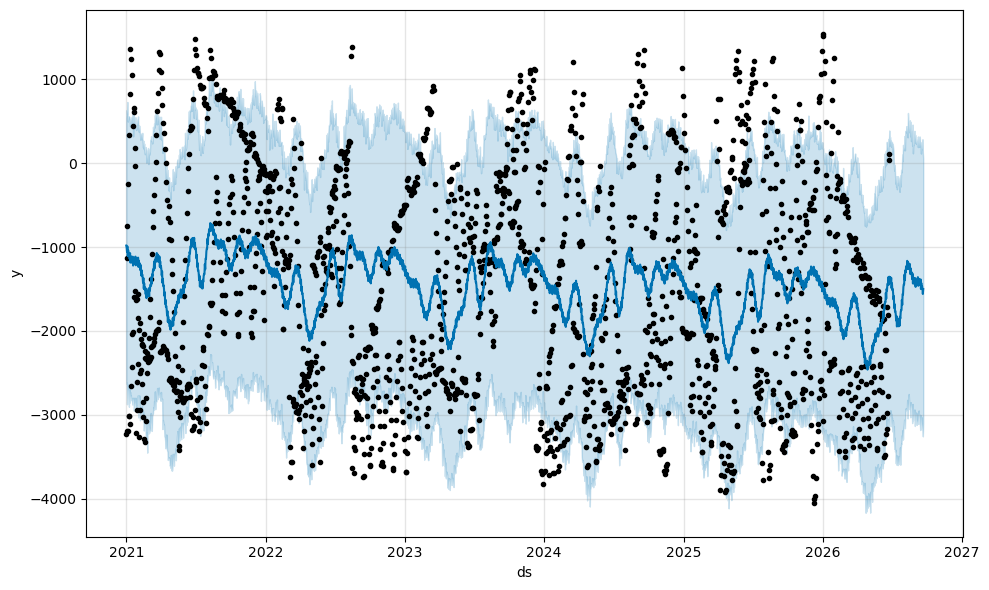

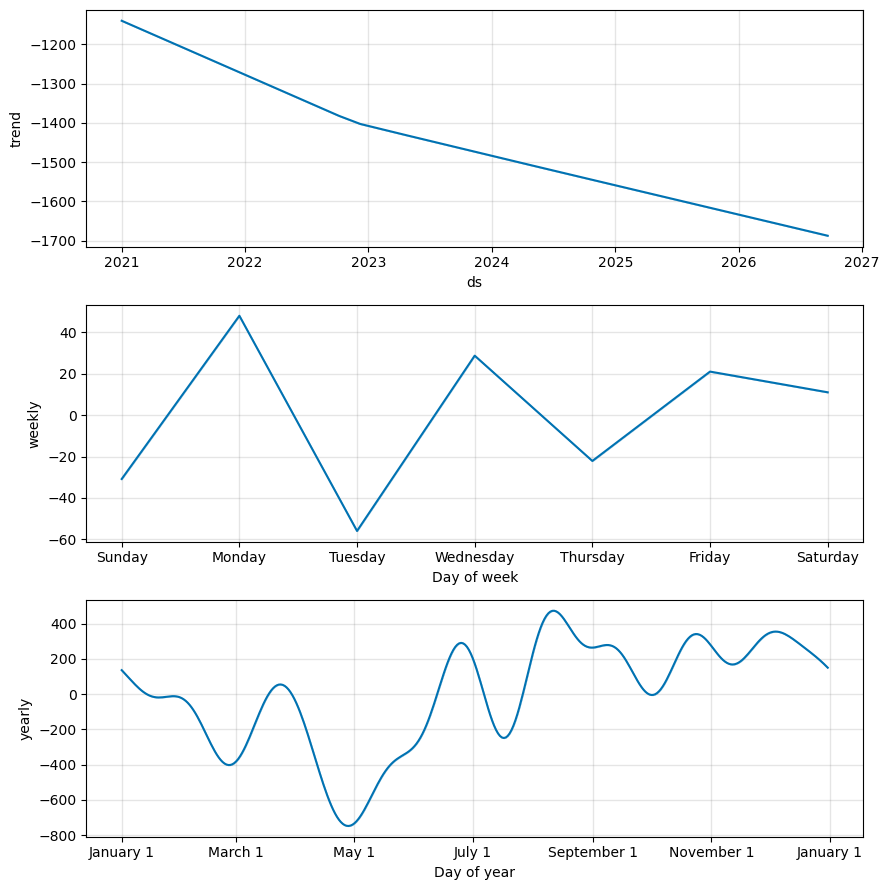

In [261]:
# Création d'un DataFrame pour les dates futures sur lesquelles faire des prédictions
future = model.make_future_dataframe(periods=90)  # Prédire 90 jours dans le futur, par exemple

# Prédiction
forecast = model.predict(future)

# Affichage des résultats
fig1 = model.plot(forecast)
fig2 = model.plot_components(forecast)


# VGGish

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchaudio

# Assume X is loaded and converted to a PyTorch tensor of shape (1000, 4, 667200)
# This example assumes X is already in this format:
X_tensor = torch.from_numpy(X).float()  # Make sure data is in float format for DSP
y_tensor = torch.from_numpy(y).float()

def tensor_to_spectograms(X_tensor):
    # Define the spectrogram transformation
    spectrogram_transform = torchaudio.transforms.Spectrogram(n_fft=512, hop_length=512)

    # Apply the transformation
    spectrograms = spectrogram_transform(X_tensor)

    # Note: torchaudio expects the dimension of (Batch, Channels, Samples), adjust if necessary
    return spectrograms.squeeze(0)

spectrograms = tensor_to_spectograms(X_tensor)

spectrograms.shape, "(batch_size, channels, freq_bins, time_steps)"

import torch.nn as nn
import torch.nn.functional as F

class VGGStyleCNN(nn.Module):
    def __init__(self):
        super(VGGStyleCNN, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(4, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(128, 256, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(256, 512, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        # The output of features will depend on the input size, which should be calculated
        self.classifier = nn.Sequential(
            nn.Linear(663552 , 4096),  # This dimension might need adjustment
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(4096, 4096),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(4096, 2),  # Assume 1000 classes; adjust as needed
            nn.Sigmoid()
        )
    
    def forward(self, x):
        x = self.features(x)
        x = torch.flatten(x, 1)
        x = self.classifier(x)
        return x

means = spectrograms.mean(dim=(0, 2, 3), keepdim=True)  # Mean across batch, height, and width but keep the channel dimension
stds = spectrograms.std(dim=(0, 2, 3), keepdim=True)    # Std across batch, height, and width

normalized_spectrograms = (spectrograms - means) / stds

from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit on the data
scaler.fit(y)

# Transform the data
normalized_y = torch.from_numpy(scaler.transform(y)).float()

# Assuming spectrograms is your dataset and positions is a tensor of shape (1000, 2)
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset, DataLoader

# Split data
train_data, test_data, train_positions, test_positions = train_test_split(spectrograms, normalized_y, test_size=0.2, random_state=42)
# Create dataloaders
batch_size = 16
train_dataset = TensorDataset(train_data, train_positions)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_dataset = TensorDataset(test_data, test_positions)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Initialize the model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# model = VGGStyleCNN()
# model.to(device)

# Loss and optimizer
# criterion = nn.MSELoss()
# optimizer = optim.Adam(model.parameters(), lr=1e-4)

num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    training_loss = 0.0
    for data, targets in train_loader:
        data, targets = data.to(device), targets.to(device)
        optimizer.zero_grad()
        outputs = model(data)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        training_loss += loss.item() 
    
    training_loss /= len(train_loader)

    # Validation phase
    model.eval()
    validation_loss = 0.0
    with torch.no_grad():
        for data, targets in test_loader:
            data, targets = data.to(device), targets.to(device)
            outputs = model(data)
            loss = criterion(outputs, targets)
            validation_loss += loss.item() 
    
    validation_loss /= len(test_loader)
    
    print(f'Epoch {epoch + 1}/{num_epochs}, Training Loss: {training_loss}, Validation Loss: {validation_loss}')

# Ensure the model is in evaluation mode
model.eval()

# Initialize counters
correct = 0
total = 0

# No gradient needed for evaluation
with torch.no_grad():
    for data, targets in test_loader:
        # Move data to the appropriate device (e.g., GPU or CPU)
        data, targets = data.to(device), targets.to(device)

        # Make predictions
        outputs = model(data)
        outputs = outputs.cpu().numpy()
        targets = targets.cpu().numpy()
        inv_pred = scaler.inverse_transform(outputs)
        inv_targets = scaler.inverse_transform(targets)
        mean_distance = np.linalg.norm(inv_pred-inv_targets, axis=1).mean()
        
        

# Calculate accuracy

print(f'Mean Distance {mean_distance:.2f}mm')
